## Final Project Submission

Please fill out:
* Student name: Ahmed Ali
* Student pace: full time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## PHASE 1 PROJECT
 
 # Goals
  - To perform Exploratory Data Analysis and Business Understanding.
  - Giving Microsoft recommendations on the best possible way to move forward.

**Importing relevant libraries.**

In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Unzipping the zipped *IMdb* Database**

In [3]:
import zipfile
import os

# Define the path to the ZIP file and the destination folder for the extracted content
zip_file_path = 'zippedData/im.db.zip'
extraction_path = 'zippedData/unzippedim.db'

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print('ZIP file extracted successfully.')


ZIP file extracted successfully.


## Data Exploration



## Understanding the ***im.db*** Database by loading them

*Connecting to the **im.db** Database*

In [4]:
conn = sqlite3.connect('zippedData/unzippedim.db/im.db')
persons = pd.read_sql("""SELECT * FROM persons;""",conn)

In [5]:
persons.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [6]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [7]:
persons.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [8]:
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [9]:
principals = pd.read_sql("""SELECT * FROM principals;""",conn)

In [10]:
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [11]:
principals.info()

principals.isna().sum()

principals['person_id'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


nm1930572     378
nm0000636     160
nm0000616     148
nm0103977     126
nm4394575     103
             ... 
nm1404249       1
nm0307710       1
nm0798014       1
nm3590666       1
nm10441595      1
Name: person_id, Length: 604546, dtype: int64

In [12]:
principals.describe()

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [13]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""",conn)

In [14]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [16]:
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [17]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""",conn)

In [19]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [22]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [23]:
movie_akas = pd.read_sql("""SELECT * FROM movie_akas;""",conn)

In [24]:
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [25]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [26]:
movie_akas.describe()

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


In [27]:
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [28]:
known_for = pd.read_sql("""SELECT * FROM known_for""",conn)

In [29]:
print(known_for.info())
known_for.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
None


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [30]:
directors = pd.read_sql("""SELECT * FROM directors;""",conn)

In [31]:
print(directors.info(),"\n\n",directors.isna().sum(),"\n\n",directors['movie_id'].value_counts())
directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None 

 movie_id     0
person_id    0
dtype: int64 

 tt4050462    3818
tt3091166    2397
tt2249786    2392
tt4942694    2013
tt3528906    1770
             ... 
tt6540924       1
tt6538400       1
tt6533312       1
tt6525346       1
tt9004986       1
Name: movie_id, Length: 140417, dtype: int64


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [32]:
writers =pd.read_sql("""SELECT * FROM writers;""",conn)

In [33]:
print(writers.info(),writers.isna().sum())
writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None movie_id     0
person_id    0
dtype: int64


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [34]:
writers['person_id'].value_counts()

nm6935209    543
nm1546474    257
nm0000636    180
nm2780568    173
nm4664031    158
            ... 
nm0381478      1
nm1127439      1
nm6287246      1
nm6285797      1
nm8352242      1
Name: person_id, Length: 122576, dtype: int64

## Data Cleaning and Visualization

Joining the *movie_basics* and *movie_ratings* tables , filtering them out and converting it to a pandas DataFrame for further Analysis

In [35]:
q = """SELECT genres,movie_id,primary_title 
         FROM movie_basics 
       JOIN movie_ratings USING(movie_id) 
        WHERE averagerating >= 7.5 AND numvotes >= 100000; """
genres_1 = pd.read_sql(q,conn)
genres_1

,genres,movie_id,primary_title
0,"Biography,Drama,Sport",tt1210166,Moneyball
1,"Biography,Drama,Thriller",tt1535109,Captain Phillips
2,"Action,Adventure,Biography",tt1663202,The Revenant
3,"Adventure,Drama,Fantasy",tt1201607,Harry Potter and the Deathly Hallows: Part 2
4,"Drama,Mystery,War",tt1255953,Incendies
...,...,...,...
167,"Action,Adventure,Sci-Fi",tt4154756,Avengers: Infinity War
168,"Action,Crime,Thriller",tt4425200,John Wick: Chapter 2
169,"Drama,Horror,Sci-Fi",tt6644200,A Quiet Place
170,"Crime,Drama",tt0780504,Drive


Joining the *principals* , *persons* and *movie_ratings* tables , filtering them out and converting them to pandas dataframme for further analysis

In [36]:
k="""
SELECT pe.primary_name,pr.category,mo.averagerating,mo.numvotes,pr.movie_id
 FROM principals AS pr
INNER JOIN persons AS pe ON pr.person_id = pe.person_id
LEFT JOIN movie_ratings AS mo ON mo.movie_id = pr.movie_id
WHERE numvotes >= 100000 AND averagerating >= 7.5;
 """

In [37]:
ratings_1 = pd.read_sql(k,conn)
ratings_1

,primary_name,category,averagerating,numvotes,movie_id
0,Brad Pitt,actor,7.6,326657,tt1210166
1,Philip Seymour Hoffman,actor,7.6,326657,tt1210166
2,Robin Wright,actress,7.6,326657,tt1210166
3,Steven Zaillian,writer,7.6,326657,tt1210166
4,Michael De Luca,producer,7.6,326657,tt1210166
...,...,...,...,...,...
1710,Joseph Trapanese,composer,7.6,175968,tt1899353
1711,Ario Sagantoro,producer,7.6,175968,tt1899353
1712,Iko Uwais,actor,7.6,175968,tt1899353
1713,Fajar Yuskemal,composer,7.6,175968,tt1899353


Merging the two previous created pandas DataFrames 

In [38]:
df_big = genres_1.merge(ratings_1).sort_values('averagerating',ascending=False)
df_big

,genres,movie_id,primary_title,primary_name,category,averagerating,numvotes
274,"Action,Drama,War",tt5813916,The Mountain II,Doruk Acar,producer,9.3,100568
268,"Action,Drama,War",tt5813916,The Mountain II,Murat Arkin,actor,9.3,100568
269,"Action,Drama,War",tt5813916,The Mountain II,Paul Englishby,composer,9.3,100568
270,"Action,Drama,War",tt5813916,The Mountain II,Mehmet Basbaran,cinematographer,9.3,100568
271,"Action,Drama,War",tt5813916,The Mountain II,Bedii Akin,actor,9.3,100568
...,...,...,...,...,...,...,...
441,"Biography,Drama",tt3263904,Sully,Valerie Mahaffey,actress,7.5,202718
440,"Biography,Drama",tt3263904,Sully,Todd Komarnicki,writer,7.5,202718
439,"Biography,Drama",tt3263904,Sully,Laura Linney,actress,7.5,202718
438,"Biography,Drama",tt3263904,Sully,Aaron Eckhart,actor,7.5,202718


Dropping the duplicates in the *genres* column

In [39]:
no_duplicated_genres = df_big['genres'].drop_duplicates().head(20)
no_duplicated_genres

274               Action,Drama,War
1350       Action,Adventure,Sci-Fi
505         Adventure,Drama,Sci-Fi
1016        Action,Biography,Drama
708     Action,Adventure,Animation
663         Biography,Comedy,Drama
689                    Drama,Music
741     Adventure,Animation,Comedy
826                  Drama,Western
228                Action,Thriller
1101       Animation,Drama,Fantasy
161                 Drama,Thriller
976                          Drama
49               Drama,Mystery,War
435                    Crime,Drama
785                    Drama,Sport
866          Biography,Crime,Drama
904           Comedy,Drama,Fantasy
1565           Action,Drama,Sci-Fi
103               Mystery,Thriller
Name: genres, dtype: object

Visulizing the *genres* against their received *averageratings* 

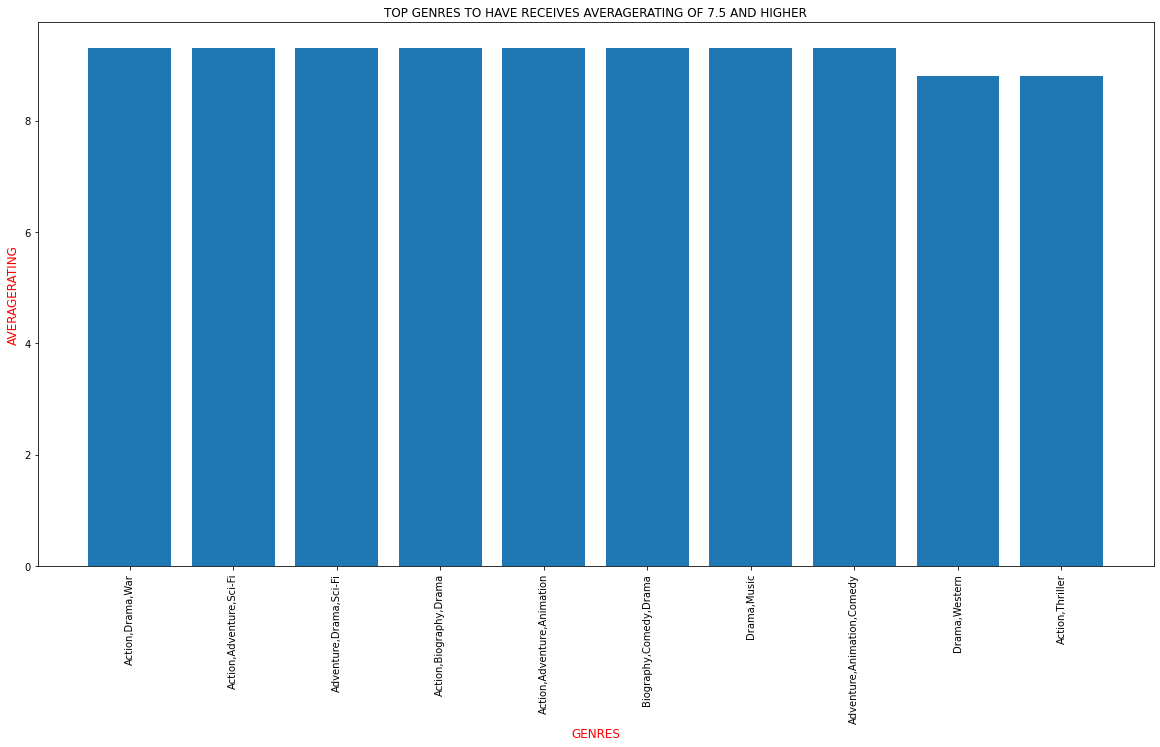

In [40]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(no_duplicated_genres.head(10),height=df_big['averagerating'].head(10))
plt.xticks(rotation=90)
ax.set_title('TOP GENRES TO HAVE RECEIVES AVERAGERATING OF 7.5 AND HIGHER')
ax.set_xlabel('GENRES',fontsize=12,color='red')
ax.set_ylabel('AVERAGERATING',color='red',fontsize=12)
plt.savefig('genres.png',bbox_inches='tight')
plt.show()

Creating an *actors* DataFrame and dropping the duplicates to extract top ten actors in the merged DataFrame

In [41]:
actors =df_big[df_big['category'] == 'actor']

In [42]:
no_duplicated_actors = actors['primary_name'].drop_duplicates()
no_duplicated_actors.head(20)  

268              Murat Arkin
271               Bedii Akin
273                Ozan Agaç
1352         Chris Hemsworth
1349            Mark Ruffalo
1474            Ken Watanabe
1469    Joseph Gordon-Levitt
1345       Robert Downey Jr.
1465       Leonardo DiCaprio
1346             Chris Evans
496      Matthew McConaughey
711           Mahershala Ali
1015              Aamir Khan
656          François Cluzet
660                  Omar Sy
715            Shameik Moore
713             Jake Johnson
689             J.K. Simmons
691             Miles Teller
686              Paul Reiser
Name: primary_name, dtype: object

Visualizing the top *actors* against their *averageratings* ratings in the movies they acted in

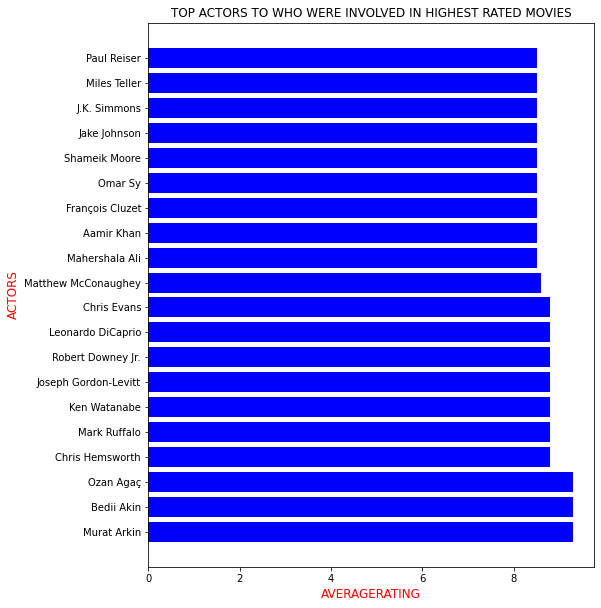

In [43]:
fig,ax = plt.subplots(figsize=(8,10))
ax.barh(no_duplicated_actors.head(20), width=actors['averagerating'].head(20),color='blue')
ax.set_title('TOP ACTORS TO WHO WERE INVOLVED IN HIGHEST RATED MOVIES')
ax.set_xlabel('AVERAGERATING',fontsize=12,color='red')
ax.set_ylabel('ACTORS',color='red',fontsize=12)
plt.show()

Creating an actresses DataFrame and visualizing the top against their received *averageratings* in movies

In [44]:
actress = df_big[df_big['category'] == 'actress']


In [45]:
no_duplicated_actresses = actress['primary_name'].drop_duplicates()
no_duplicated_actresses.head(20) 

275           Eylül Arular
1471            Ellen Page
505          Mackenzie Foy
498          Anne Hathaway
504       Jessica Chastain
1016    Fatima Sana Shaikh
1023        Sanya Malhotra
714       Hailee Steinfeld
657             Anne Le Ny
661         Audrey Fleurot
1017         Sakshi Tanwar
692        Melissa Benoist
1101    Mone Kamishiraishi
737           Alanna Ubach
835       Kerry Washington
1099              Aoi Yûki
168            Sareh Bayat
199       Linda Cardellini
160           Leila Hatami
1106           Joan Cusack
Name: primary_name, dtype: object

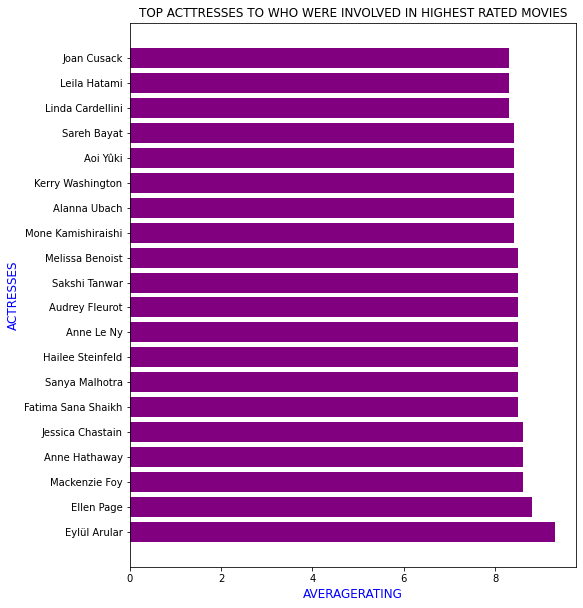

In [46]:
fig,ax = plt.subplots(figsize=(8,10))
ax.barh(no_duplicated_actresses.head(20), width=actress['averagerating'].head(20),color='purple')
ax.set_title('TOP ACTTRESSES TO WHO WERE INVOLVED IN HIGHEST RATED MOVIES')
ax.set_xlabel('AVERAGERATING',fontsize=12,color='blue')
ax.set_ylabel('ACTRESSES',color='blue',fontsize=12)
plt.show()

Creating a directors DataFrame and visualizing the top directors


In [47]:
directors = df_big[df_big['category'] == 'director']

In [48]:
no_duplicated_directors = directors['primary_name'].drop_duplicates()
no_duplicated_directors.head(20) 

272          Alper Caglar
1350        Anthony Russo
1351            Joe Russo
1470    Christopher Nolan
710        Rodney Rothman
709          Peter Ramsey
712       Bob Persichetti
658       Olivier Nakache
659         Éric Toledano
1019        Nitesh Tiwari
695       Damien Chazelle
743           Lee Unkrich
744         Adrian Molina
827     Quentin Tarantino
1097       Makoto Shinkai
202        Peter Farrelly
163        Asghar Farhadi
979     Thomas Vinterberg
45       Denis Villeneuve
434       Martin McDonagh
Name: primary_name, dtype: object

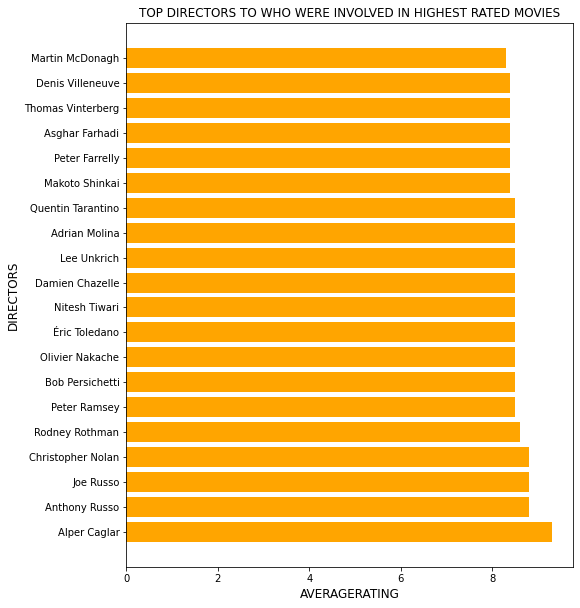

In [49]:
fig,ax = plt.subplots(figsize=(8,10))
ax.barh(no_duplicated_directors.head(20), width=directors['averagerating'].head(20),color='orange')
ax.set_title('TOP DIRECTORS TO WHO WERE INVOLVED IN HIGHEST RATED MOVIES')
ax.set_xlabel('AVERAGERATING',fontsize=12,color='black')
ax.set_ylabel('DIRECTORS',color='black',fontsize=12)
plt.show()

In [50]:
writers=  df_big[df_big['category'] == 'writer']

In [51]:
no_duplicated_writers = writers['primary_name'].drop_duplicates()
no_duplicated_writers.head(20) 

1353             Christopher Markus
1347                     Jack Kirby
1354                Stephen McFeely
1348                       Stan Lee
500                  Jonathan Nolan
707                       Phil Lord
1024               Rajshri Sudhakar
1022                   Shreyas Jain
1020                   Piyush Gupta
1021                Nikhil Mehrotra
665         Philippe Pozzo di Borgo
742                      Jason Katz
230                        Bob Kane
232                  David S. Goyer
738                 Matthew Aldrich
1095                    Clark Cheng
201              Brian Hayes Currie
203                 Nick Vallelonga
982                 Tobias Lindholm
49      Valérie Beaugrand-Champagne
Name: primary_name, dtype: object

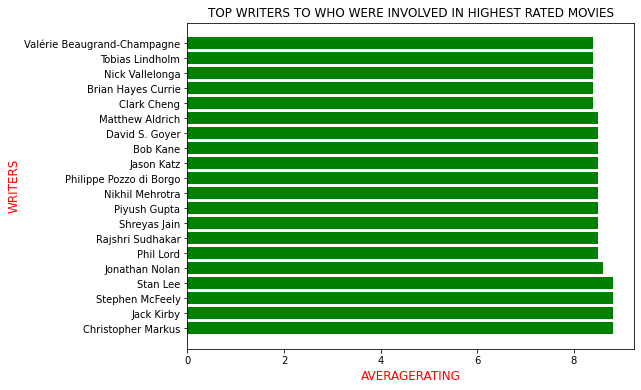

In [52]:
fig,ax = plt.subplots(figsize=(8,6))
ax.barh(no_duplicated_writers.head(20), width=writers['averagerating'].head(20),color='green')
ax.set_title('TOP WRITERS TO WHO WERE INVOLVED IN HIGHEST RATED MOVIES')
ax.set_xlabel('AVERAGERATING',fontsize=12,color='red')
ax.set_ylabel('WRITERS',color='red',fontsize=12)
plt.show()

After loading, exploring, analysing, cleaning and viualizing the ***im.db*** Database, here are the top *actors*, *actresses*, *directors* and *writers* who were involved in making movies which were rated **7.5+** on **IMDb** and which received over **hundred thousand** votes from **unique voters**.

## The top actors include
- Murat Arkin
- Bedii Akin
-   Ozan Agaç
-Chris Hemsworth
- Mark Ruffalo
-Ken Watanabe
-Joseph Gordon-Levitt
-Robert Downey Jr.
- Leonardo DiCaprio
-  Chris Evans
-  Matthew McConaughey
-  Mahershala Ali
- Aamir Khan
- François Cluzet
- Omar Sy
- Shameik Moore
- Jake Johnson
- J.K. Simmons
- Miles Teller
-Paul Reiser

 


## The top actresses include

- Eylül Arular
-        Ellen Page
-      Mackenzie Foy
-     Anne Hathaway
-   Je-ssica Chastain
-  Fatima Sana Shaikh
-     Sanya Malhotra
-    Hailee Steinfeld
-      Anne Le Ny
-   Audrey Fleurot
-     Sakshi Tanwar
-    Melissa Benoist
-  Mone Kamishiraishi
-      Alanna Ubach
-   Kerry Washington
-           Aoi Yûki
-            Sareh Bayat
-    Linda Cardellini
-Leila Hatami
-         Joan Cusack

## The top directors include
-         Alper Caglar
-     Anthony Russo
-            Joe Russo
-    Christopher Nolan
-      Rodney Rothman
-        Peter Ramsey
-      Bob Persichetti
-      Olivier Nakache
-        Éric Toledano
-       Nitesh Tiwari
-    Damien Chazelle
-          Lee Unkrich
-        Adrian Molina
-    Quentin Tarantino
-       Makoto Shinkai
-     Peter Farrelly
-      Asghar Farhadi
-Thomas Vinterberg
-Denis Villeneuve
-Martin McDonagh

## The top writers include

-           Christopher Markus
-                    Jack Kirby
-             Stephen McFeely
-                    Stan Lee
-            Jonathan Nolan
-                     Phil Lord
-           Rajshri Sudhakar
-               Shreyas Jain
-             Piyush Gupta
-           Nikhil Mehrotra
-   Philippe Pozzo di Borgo
-               Jason Katz
-              Bob Kane
-          David S. Goyer
-            Matthew Aldrich
-                  Clark Cheng
-            Brian Hayes Currie
-              Nick Vallelonga
-             Tobias Lindholm
-Valérie Beaugrand-Champagne

The combination of genres which produces exceptional movies that were rated as high as ***9.3*** on ***IMDb*** that also received more than *** hundred thousand*** from unique voters were as follows

- Action,Drama,War
-      Action,Adventure,Sci-Fi
-        Adventure,Drama,Sci-Fi
-Action,Biography,Drama
-Action,Adventure,Animation
-        Biography,Comedy,Drama
-                   Drama,Music
-    Adventure,Animation,Comedy
-                  Drama,Western
-               Action,Thriller
-      Animation,Drama,Fantasy
-                Drama,Thriller
-                         Drama
-Drama,Mystery,War
-                  Crime,Drama
-                   Drama,Sport
-         Biography,Crime,Drama
-         Comedy,Drama,Fantasy
-           Action,Drama,Sci-Fi
-            Mystery,Thriller

# Exploring the  bom.movie_gross.csv Dataset

In [53]:
df = pd.read_csv("zippedData/bom.movie_gross.csv/bom.movie_gross.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/bom.movie_gross.csv/bom.movie_gross.csv'

In [ ]:
df

In [ ]:
duplicates = df[df.duplicated()]
len(duplicates)

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df.dropna(subset='domestic_gross',inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(subset='foreign_gross',inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df['foreign_gross'].dtype

In [ ]:
df['domestic_gross'].dtype

In [ ]:
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').astype('float')

In [ ]:
df['foreign_gross'] = df['foreign_gross'].astype('int')

In [ ]:
df['domestic_gross'] = df['domestic_gross'].astype('int')

In [ ]:
df['gross_combined'] =df['domestic_gross'] + df['foreign_gross']

In [ ]:
df['foreign_gross']

In [ ]:
# To show the relationship between domestic_gross and foreign_gross
fig,ax = plt.subplots(figsize=(14,6))
domestic_gross = df['domestic_gross']
foreign_gross = df['foreign_gross']
ax.scatter(domestic_gross,foreign_gross,color='red',marker='*',label='domestic_gross')
ax.set_xlabel('Domestic Gross',fontsize=16,color='red')
ax.set_ylabel('Foreign Gross',fontsize=16,color='red')
ax.set_title('Scatter Plot showing relationship between Domestic vs. Foreign Gross',fontsize=18,color='red')
plt.legend()
plt.show()

In [ ]:
correlation = df['domestic_gross'].corr(df['foreign_gross'])
correlation

A positive correlation of 0.76799 indicates that the movie which performed better in home countries also performed better in foreign countries or on international level.

## Movies to gross over a billion

In [ ]:
above_billion = df[df['gross_combined'] >= 1000000000].sort_values(by='gross_combined')
above_billion

In [ ]:
# visualizing movies which grosssed over a billion against their box oofice
fig,ax = plt.subplots(figsize=(12,8))
movies = above_billion['title']
box_office = above_billion['gross_combined']
ax.barh(movies,width=box_office)
ax.set_title("MOVIES THAT GROSSED OVER A BILLION WORLDWIDE",fontsize=20,color='purple')
ax.set_xlabel('GROSS EARNINGS',fontsize=16,color='red')
ax.set_ylabel('MOVIES',fontsize=16,color='red')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('moviebox1.png',bbox_inches='tight')
plt.show()

## Studios that directed movies which resulted in over a Billion in gross earnings.

In [ ]:
above_billion['studio'].value_counts()

In [ ]:
# Visualizing the Data above_billion
fig , ax = plt.subplots(figsize=(12,8))
ax.bar(above_billion['studio'].value_counts().index,height=above_billion['studio'].value_counts(),color="red")
ax.set_title('STUDIO WITH THE HIGHEST NUMBER OF MOVIE TO GROSS OVER A BILLION',fontsize=22)
ax.set_xlabel("STUDIO",fontsize=18)
ax.set_ylabel("NUMBER OF MOVIE BY THE STUDIO",fontsize=18)
plt.savefig('studios.png',bbox_inches='tight')
plt.show()

Movies which grossed over a **Billion** *USD* Worldwide where mainly by BV studio.



After carefully researching their genres on the web.

They were of the following genres:
   * SCI-FI 
   - FANTASY
   - ACTION
   - ADVENTURE
   - ANIMATED